<a href="https://colab.research.google.com/github/sherbeenyy/Diabetes-Neural-Network-detection/blob/master/diabetes_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.layers as kl
import keras.models as km
import pandas as pd

In [21]:
df = pd.read_csv('/content/drive/MyDrive/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
x = df.drop(['Outcome', 'SkinThickness'] ,axis=1)

y = df['Outcome']

In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
from sklearn.impute import KNNImputer
df.replace(0, np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=2)
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(imputed_df)

x = imputed_df.drop(['Outcome', 'SkinThickness'] ,axis=1)

y = imputed_df['Outcome']

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    138.0  33.6   
1            1.0     85.0           66.0           29.0     88.5  26.6   
2            8.0    183.0           64.0           37.5    227.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4           12.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    202.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           33.5    123.5  30.1   
767          1.0     93.0           70.0           31.0     62.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (576, 7)
X_test shape is  (192, 7)
y_train shape is  (576,)
y_test shape is  (192,)


In [26]:
model = km.Sequential([
    kl.Dense(8, activation='relu', input_shape=(7,)),
    kl.Dense(16, activation='relu'),
    kl.Dense(128, activation='relu'),
    kl.Dense(16, activation='relu'),
    kl.Dense(8, activation='relu'),
    kl.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
train = model.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10,
                         verbose=1)

Epoch 1/100
58/58 [==============================] - 2s 7ms/step - loss: 0.0712 - accuracy: 0.9705 - val_loss: 9.9280e-04 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 9.3097e-04 - accuracy: 1.0000 - val_loss: 1.2738e-04 - val_accuracy: 1.0000
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 2.4306e-04 - accuracy: 1.0000 - val_loss: 3.3614e-05 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 9.9912e-05 - accuracy: 1.0000 - val_loss: 8.0314e-06 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 4.2258e-05 - accuracy: 1.0000 - val_loss: 2.4550e-06 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 2.4027e-05 - accuracy: 1.0000 - val_loss: 1.0698e-06 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 1.5737e-05 - accuracy: 1.0000 - val_l

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 128)               2176      
                                                                 
 dense_9 (Dense)             (None, 16)                2064      
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4593 (17.94 KB)
Trainable params: 4593 (

In [29]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 1.2871e-11 - accuracy: 1.0000


[1.2870586540980611e-11, 1.0]

In [30]:
y_pred = model.predict(X_test)


6/6 [==============================] - 0s 2ms/step


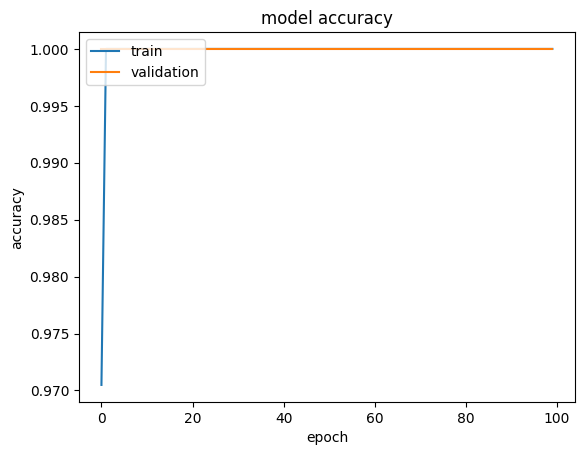

In [31]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


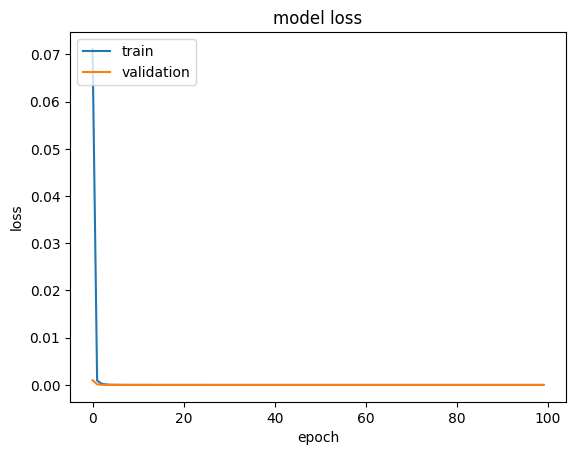

In [32]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [33]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [34]:
y_test

452    1.0
370    1.0
746    1.0
122    1.0
614    1.0
      ... 
458    1.0
524    1.0
43     1.0
66     1.0
76     1.0
Name: Outcome, Length: 192, dtype: float64